# Testing Data Analytics for single parlay return simulated annueling (SA_1P)
* uses highest risk as optimization target 'Value" 
* tested using theoretical games generated by a script
* tested against a brute force search algorithm for correctness, which had to take much longer to run
* SA Cooling linear cooling scedulae used: temperature = temperature_init / (1 + (3 *countIter))
* Initial Temperature used: 100

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load CSV file into a DataFrame
df = pd.read_csv('SA_1P_testingData1.csv')

# Display the DataFrame
df

,Test_ID,numGames,numParlays,runtime,temp_threshold,SA_Correctness,SA_Offset
0,0,4,9,0.0039,1.501,0.93000,8
1,1,5,8,0.0578,0.105,0.99998,2
2,2,5,10,0.0340,0.205,0.99997,7
3,3,4,9,0.0337,0.227,0.99993,8
4,4,2,7,0.0407,0.130,1.00000,0
...,...,...,...,...,...,...,...
1195,1195,5,6,0.0037,1.311,1.00000,0
1196,1196,2,4,0.0025,1.320,0.99804,4
1197,1197,1,2,0.0032,0.745,1.00000,0
1198,1198,2,2,0.0025,1.108,0.97120,2


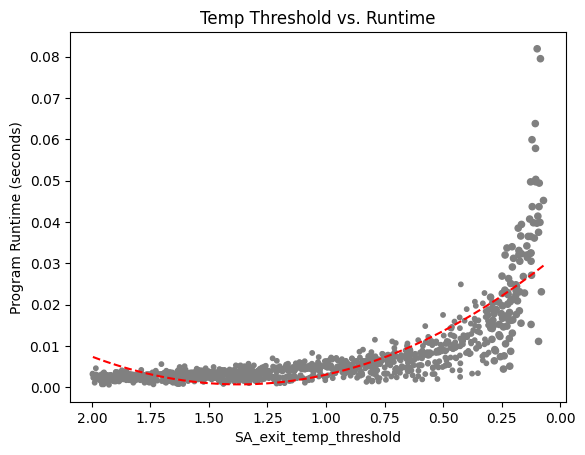

In [3]:
# Select columns to plot
x = df['temp_threshold']
y = df['runtime']

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['runtime'], s=counts['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

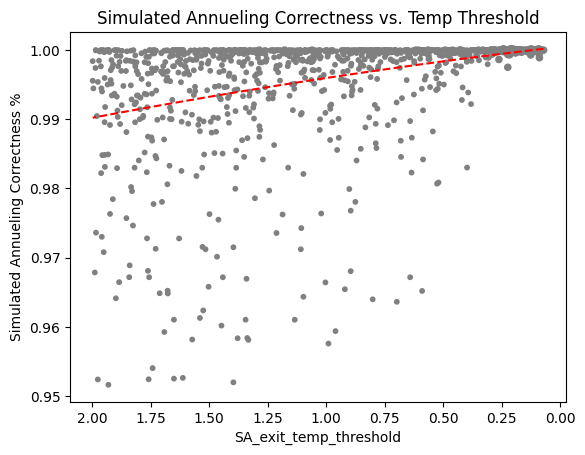

In [9]:
#exclude outliers
df = df[df['SA_Correctness'] >= 0.85]

# Select columns to plot
x = df['temp_threshold']
y = df['SA_Correctness']

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Correctness']).size().reset_index(name='count')

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['SA_Correctness'], s=counts['count']*10, label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Simulated Annueling Correctness %')
plt.title('Simulated Annueling Correctness vs. Temp Threshold')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()

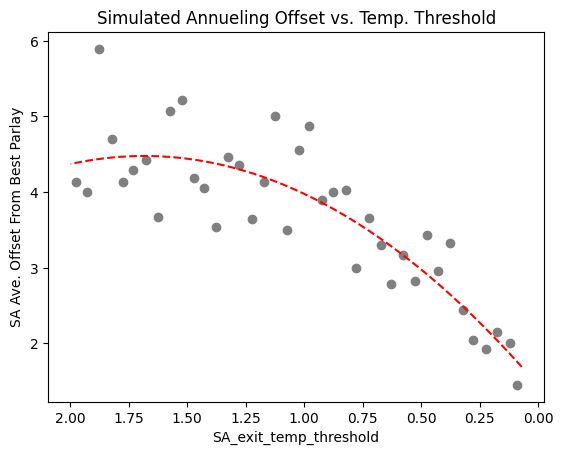

In [5]:
# Select columns to plot
x = df['temp_threshold']
y = df['SA_Offset']

# Set the bin size for the x axis
bins = np.arange(0,2.5,0.05)

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Offset']).size().reset_index(name='count')
averages_df = df.groupby(pd.cut(x, bins=bins)).mean().reset_index(drop=True)

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=averages_df['temp_threshold'], y=averages_df['SA_Offset'], label='thresh_v_Offset', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('SA Ave. Offset From Best Parlay')
plt.title('Simulated Annueling Offset vs. Temp. Threshold')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()